# Library import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from sklearn.preprocessing import scale, normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC, LinearSVC
sns.set(style="whitegrid")

# Data import & exploration

In [15]:
df = pd.read_csv("data_one_week_cleaned.csv", low_memory=False)
df.drop('auction_id',axis = 1, inplace = True)
print("Taille :",df.shape)

Taille : (44283, 77)


In [198]:
df.head()

,click,exchange,app_or_site,has_gps,device_type,connection_type,has_ifa,win_price,win_price_loc,bidder_name,...,Timestamp_second,Timestamp_minute,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,Timestamp_Month,Days_Since_Campaign_Starts,Days_Before_Campaign_Ends,Campaign_Duration,creative_size
0,0,mopub,app,True,4,2,True,0.15000,0.15000,albatros,...,2,16,23,5,15,8,76,46,122,300x250
1,0,rubicon,app,True,1,2,True,5.04214,4.54997,butor,...,59,17,21,6,16,8,8,106,114,300x250
2,0,mopub,app,True,4,6,True,4.73000,4.26495,albatros,...,42,32,23,7,17,8,38,14,52,320x480
3,0,teads,site,True,4,unknown,False,6.00000,6.00000,albatros,...,6,15,22,6,16,8,3,15,18,300x250
4,0,mopub,app,True,4,6,True,1.39000,1.39000,butor,...,6,27,5,4,21,8,34,63,97,320x480


In [199]:
df.columns

Index(['click', 'exchange', 'app_or_site', 'has_gps', 'device_type',
       'connection_type', 'has_ifa', 'win_price', 'win_price_loc',
       'bidder_name', 'Device_language', 'Country_language',
       'Device_lg_Equals_country_lg', 'Continent', 'Country_code',
       'Country_name', 'City', 'Timestamp', 'IAB1', 'IAB1%', 'IAB10', 'IAB11',
       'IAB12', 'IAB13', 'IAB14', 'IAB15', 'IAB16', 'IAB17', 'IAB18', 'IAB19',
       'IAB2', 'IAB20', 'IAB21', 'IAB22', 'IAB23', 'IAB24', 'IAB3', 'IAB3%',
       'IAB4', 'IAB5', 'IAB6', 'IAB7', 'IAB8', 'IAB9', 'IAB9%', 'books',
       'busin', 'educa', 'enter', 'finan', 'games', 'healt', 'lifes', 'medic',
       'music', 'navig', 'news', 'photo', 'produ', 'refer', 'socia', 'sport',
       'trave', 'unkno', 'utili', 'weath', 'fullOsInfo', 'Timestamp_second',
       'Timestamp_minute', 'Timestamp_hour', 'Timestamp_DayOfWeek',
       'Timestamp_DayOfMonth', 'Timestamp_Month', 'Days_Since_Campaign_Starts',
       'Days_Before_Campaign_Ends', 'Campaign_

# Data preprocessing

In [16]:
# First, drop some columns that are useless for our model
df.drop(['Timestamp_second', 'Timestamp_minute', 'Timestamp', 'Timestamp_Month',
         'Country_language', 'win_price_loc'], axis=1, inplace=True)

In [17]:
# Separate variable into binair, multi categorie and numeric
col = df.columns
bin_var = []
M_cat_var = []
num_var = []
for el in col:
    if(len(df[el].unique()) == 2):
        bin_var.append(el)
    elif ((2 < len(df[el].unique()) < 40)) :
        M_cat_var.append(el)
    else:
        num_var.append(el)
print("Variable binaires : ", len(bin_var), "\nVariable Catégorielle :",
      len(M_cat_var), "\nVariable numéirque :", len(num_var))

Variable binaires :  53 
Variable Catégorielle : 13 
Variable numéirque : 5


## Binary variable

In [202]:
df[bin_var].head()

,click,app_or_site,has_gps,has_ifa,Device_lg_Equals_country_lg,IAB1,IAB1%,IAB10,IAB11,IAB12,...,news,photo,produ,refer,socia,sport,trave,unkno,utili,weath
0,0,app,True,True,False,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,app,True,True,True,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,app,True,True,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,site,True,False,False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,app,True,True,False,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [18]:
# Let's binarize some variable

df.app_or_site = [1 if el == 'app' else 0 for el in df.app_or_site]
df.has_gps = [1 if el == True else 0 for el in df.has_gps]
df.has_ifa = [1 if el == True else 0 for el in df.has_ifa]
df.Device_lg_Equals_country_lg = [
    1 if el == True else 0 for el in df.Device_lg_Equals_country_lg]

## Multicategorical var

In [206]:
df[M_cat_var].head()

,exchange,device_type,connection_type,bidder_name,Device_language,Continent,Country_code,Country_name,fullOsInfo,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,creative_size
0,mopub,4,2,albatros,en,Asia,AE,United Arab Emirates,iOS_12,23,5,15,300x250
1,rubicon,1,2,butor,de,Europe,DE,Germany,iOS_12,21,6,16,300x250
2,mopub,4,6,albatros,ar,Europe,FR,France,Android_8,23,7,17,320x480
3,teads,4,unknown,albatros,en,America,CA,Canada,iOS_12,22,6,16,300x250
4,mopub,4,6,butor,fr,Asia,YE,Yemen,iOS_11,5,4,21,320x480


In [19]:
# Remove city from num_var and add it as categorial var
M_cat_var.append('City')
num_var.remove('City')

In [20]:
# See the number of level for each var
for el in M_cat_var:
    print(el, len(df[el].unique()))

exchange 12
device_type 4
connection_type 7
bidder_name 3
Device_language 38
Continent 5
Country_code 35
Country_name 35
fullOsInfo 24
Timestamp_hour 24
Timestamp_DayOfWeek 7
Timestamp_DayOfMonth 10
creative_size 10
City 51


In [21]:
# Discrétisation of the hour
# 0h - 8h = Nuit
# 8h - 12h = Matin
# 12h - 18h = Après-midi
# 18h - 0h = Soir 
df.Timestamp_hour = pd.cut(df.Timestamp_hour, [0, 8,12,18,24], labels=['nuit','Matin','Aprem','Soir'])

In [22]:
# Convert variable into categoy
for el in M_cat_var:
    df[el] = df[el].astype('category')

In [211]:
df[M_cat_var].head()

,exchange,device_type,connection_type,bidder_name,Device_language,Continent,Country_code,Country_name,fullOsInfo,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,creative_size,City
0,mopub,4,2,albatros,en,Asia,AE,United Arab Emirates,iOS_12,Soir,5,15,300x250,Dubai
1,rubicon,1,2,butor,de,Europe,DE,Germany,iOS_12,Soir,6,16,300x250,Berlin
2,mopub,4,6,albatros,ar,Europe,FR,France,Android_8,Soir,7,17,320x480,Paris
3,teads,4,unknown,albatros,en,America,CA,Canada,iOS_12,Soir,6,16,300x250,Toronto
4,mopub,4,6,butor,fr,Asia,YE,Yemen,iOS_11,nuit,4,21,320x480,Aden


## Numeric Variable

In [23]:
df[num_var].head()

,win_price,Days_Since_Campaign_Starts,Days_Before_Campaign_Ends,Campaign_Duration
0,0.15000,76,46,122
1,5.04214,8,106,114
2,4.73000,38,14,52
3,6.00000,3,15,18
4,1.39000,34,63,97


In [24]:
# Scale numeric var
for el in num_var:
    df[el] = scale(df[el])

In [215]:
df.head()

,click,exchange,app_or_site,has_gps,device_type,connection_type,has_ifa,win_price,bidder_name,Device_language,...,utili,weath,fullOsInfo,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,Days_Since_Campaign_Starts,Days_Before_Campaign_Ends,Campaign_Duration,creative_size
0,0,mopub,0,1,4,2,1,-0.596066,albatros,en,...,0,0,iOS_12,Soir,5,15,3.288217,1.069634,2.380897,300x250
1,0,rubicon,0,1,1,2,1,1.294197,butor,de,...,0,0,iOS_12,Soir,6,16,-0.733083,3.647355,2.144289,300x250
2,0,mopub,0,1,4,6,1,1.173590,albatros,ar,...,0,0,Android_8,Soir,7,17,1.041020,-0.305150,0.310572,320x480
3,0,teads,0,1,4,unknown,0,1.664303,albatros,en,...,0,0,iOS_12,Soir,6,16,-1.028767,-0.262188,-0.695014,300x250
4,0,mopub,0,1,4,6,1,-0.116945,butor,fr,...,0,0,iOS_11,nuit,4,21,0.804473,1.799989,1.641496,320x480


## Dummification

In [25]:
df1 = df.drop(M_cat_var, axis= 1) # data frame without multicat var
df2 = df[M_cat_var] # Variable to dummy
df2 = pd.get_dummies(df2)
data = pd.concat([df1, df2], axis=1)
data.shape

(44283, 302)

In [217]:
data.head()

,click,app_or_site,has_gps,has_ifa,win_price,Device_lg_Equals_country_lg,IAB1,IAB1%,IAB10,IAB11,...,City_Tehran,City_Tijuana,City_Tokyo,City_Toronto,City_Tunis,City_Vaduz,City_Vienna,City_Vientiane,City_Vilnius,City_Zurich
0,0,0,1,1,-0.596066,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1.294197,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1.173590,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1.664303,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1,-0.116945,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD for dimensionnal reduction

In [26]:
svd = TruncatedSVD(n_components=20, n_iter=7, random_state=42)
X = data.drop('click', axis = 1)
X_normalised = normalize(X) # Normalize before svd
X_transform = svd.fit_transform(X_normalised)
print("Pourcentage d'inertie : ", svd.explained_variance_ratio_.sum())

Pourcentage d'inertie :  0.804449798620644


In [27]:
## Concatenate dataframe for modelization
X = pd.DataFrame(X_transform)
dataF = pd.concat([data.click, X], axis=1)
print("Shape before SVD : ",data.shape,"\nShape after SVD : ", dataF.shape,)

Shape before SVD :  (44283, 302) 
Shape after SVD :  (44283, 21)


In [223]:
dataF.head()

,click,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.239720,-0.182906,0.562510,-0.164532,-0.360404,0.105818,0.434236,-0.003728,0.175631,...,-0.148058,-0.035611,0.064235,0.006775,0.030498,-0.032721,0.071570,0.011526,0.034021,0.024630
1,0,0.235869,-0.108414,0.655370,-0.078453,0.127249,0.399215,-0.163075,-0.164201,-0.124046,...,0.038883,0.147599,0.085544,-0.020629,-0.090508,0.002784,-0.190993,0.011891,-0.057900,-0.106653
2,0,0.459670,-0.019355,0.376591,0.062483,0.026900,-0.181445,0.140725,0.243506,0.002367,...,-0.107027,-0.048884,-0.125425,-0.132561,-0.113364,-0.218919,0.121626,0.092727,0.201657,0.063101
3,0,0.294178,0.399848,0.181519,0.105549,0.366002,-0.073995,0.101619,-0.063145,-0.051825,...,-0.134144,0.131432,0.181608,-0.004004,-0.045709,-0.070571,0.001825,0.012912,0.078696,-0.055717
4,0,0.300416,-0.016187,0.451747,-0.264057,-0.243983,0.129633,0.147057,-0.076987,-0.063274,...,0.317214,-0.058523,0.059770,-0.026747,0.007830,0.050039,-0.112370,0.205115,-0.044305,-0.047022


## Train test split

In [34]:
train, test =train_test_split(dataF,  test_size=0.33, random_state=42)
y_train = train.click
y_test = test.click
x_train = train.drop('click', axis = 1)
x_test = test.drop('click',  axis = 1)
y_train.shape, x_train.shape, x_test.shape, y_test.shape

((29669,), (29669, 20), (14614, 20), (14614,))

# Modelization v1

In [35]:
mod1 = LogisticRegression()
mod1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Score Mod1

In [36]:
scoreTest1 = mod1.score(x_test, y_test)
scoreTrain1 = mod1.score(x_train, y_train)
print("Score Train : ", scoreTrain1, 
     "\nScore Test : ", scoreTest1)

Score Train :  0.9905625400249418 
Score Test :  0.9917886957711783


### Confusion matrix mod1

In [37]:
pred1 = mod1.predict(x_test)
cm1 = metrics.confusion_matrix(y_test, pred1)
print(cm1)

[[14494     0]
 [  120     0]]


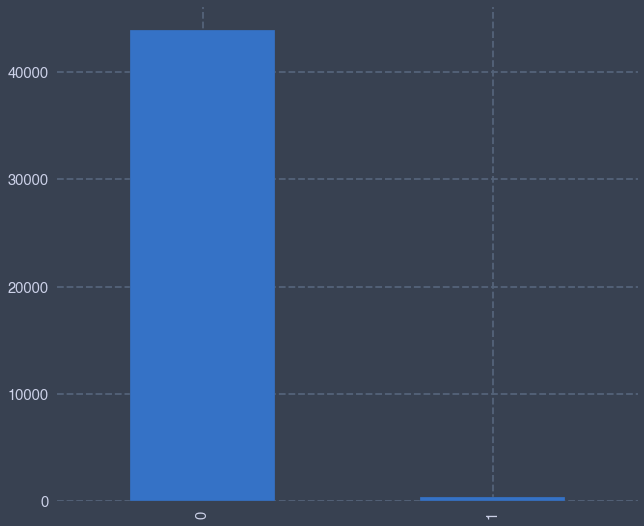

In [38]:
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
dataF.click.value_counts().plot(kind = 'bar')

# Imbelencing problem fixe

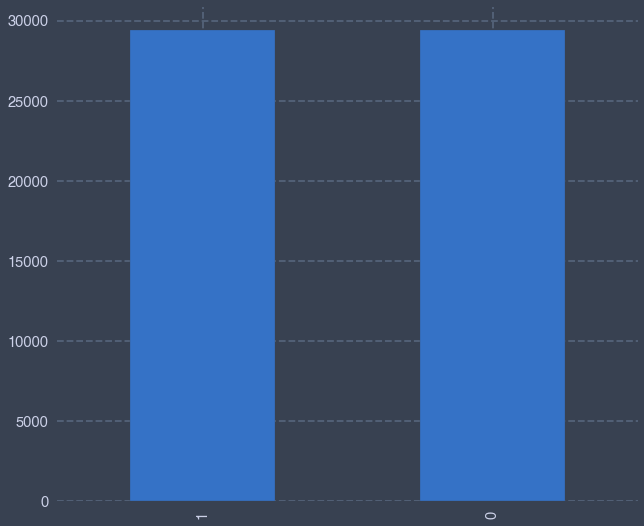

In [39]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(x_train, y_train)
y_train.value_counts().plot(kind = 'bar')

# Modelization v2

In [40]:
mod2 = LogisticRegression()
mod2.fit(X_train, y_train)
pred2 = mod2.predict(x_test)

### Score Mod2

In [41]:
scoreTest2 = mod2.score(x_test, y_test)
scoreTrain2 = mod2.score(X_train, y_train)
print("Score Train : ", scoreTrain2, 
     "\nScore Test : ", scoreTest2)

Score Train :  0.764690870733948 
Score Test :  0.7100041056521144


### Confusion matrix mod2

In [232]:
cm2 = metrics.confusion_matrix(y_test, pred2)
print(cm2)

[[10283  4211]
 [   32    88]]


### report mod2

In [233]:
print(classification_report(y_test, pred2, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     14494
           1       0.02      0.73      0.04       120

    accuracy                           0.71     14614
   macro avg       0.51      0.72      0.43     14614
weighted avg       0.99      0.71      0.82     14614



### ROC curve mod2

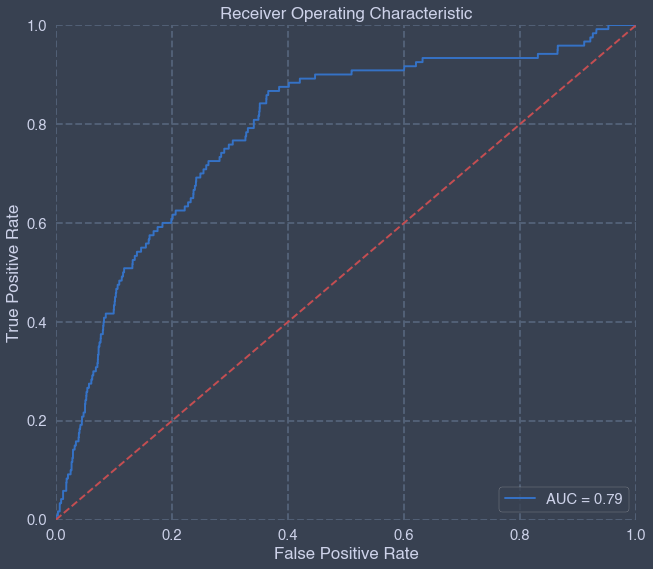

In [42]:
# calculate the fpr and tpr for all thresholds of the classification
probs = mod2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Param turning (Mod3)

In [43]:
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2', 'elasticnet']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

max_iter = [100, 200, 300, 400, 500]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, max_iter= max_iter)

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)

/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFaile

/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  

/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  

/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/omarseck/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  

In [44]:
bestP = best_model.best_estimator_.get_params()['penalty']
bestC = best_model.best_estimator_.get_params()['C']
bestMI = best_model.best_estimator_.get_params()['max_iter']
print('Best Penalty:', bestP)
print('Best C:', bestC)
print('Best max_iter:', bestMI)

Best Penalty: l2
Best C: 464.15888336127773
Best max_iter: 100


# Modelization Mod3

In [45]:
mod3 = LogisticRegression(penalty = bestP, C = bestC, max_iter = bestMI )
mod = mod3.fit(X_train, y_train)
pred3 = mod3.predict(x_test)

### Score Mod3

In [46]:
scoreTest3 = mod3.score(x_test, y_test)
scoreTrain3 = mod3.score(X_train, y_train)
print("Score de Train : ", scoreTrain3, 
     "\nScore de Test : ", scoreTest3)

Score de Train :  0.7646568443975638 
Score de Test :  0.7105515259340358


### Confusion Matrix Mod3

In [47]:
cm3 = metrics.confusion_matrix(y_test, pred3)
print(cm3)

[[10295  4199]
 [   31    89]]


### Report Mod3

In [48]:
print(classification_report(y_test, pred3, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     14494
           1       0.02      0.74      0.04       120

    accuracy                           0.71     14614
   macro avg       0.51      0.73      0.43     14614
weighted avg       0.99      0.71      0.82     14614



### Roc curve Mod3

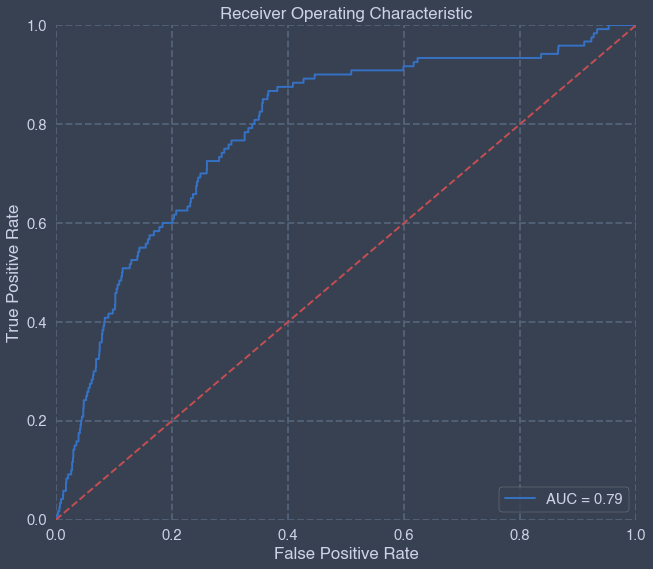

In [49]:
# calculate the fpr and tpr for all thresholds of the classification
probs = mod3.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
mod3.coef_

array([[-5.72347113, -3.8147907 ,  0.91528231, -4.50849589, -0.65376994,
        -2.70520565, -4.23257897,  3.26327534,  1.11005801,  1.44302388,
        -0.53233602,  0.72873565, -0.27887039, -0.75826056, -1.22812606,
        -0.93356735, -2.42994632, -2.72877243, -1.03968076,  0.3726094 ]])